In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
import wrangle

from wrangle import wrangle_telco

from wrangle import split

In [3]:
df = wrangle_telco()

In [4]:
df = df.set_index("customer_id")

In [5]:
df.head()

,monthly_charges,tenure,total_charges
customer_id,,,
0013-SMEOE,109.70,71,7904.25
0014-BMAQU,84.65,63,5377.80
0016-QLJIS,90.45,65,5957.90
0017-DINOC,45.20,54,2460.55
0017-IUDMW,116.80,72,8456.75


In [6]:
df.shape

(1685, 3)

In [7]:
train, validate, test = split(df)

In [8]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
6586-MYGKD,76.95,70,5289.80
1270-XKUCC,19.70,30,599.25
6425-JWTDV,19.25,48,855.10
6916-HIJSE,84.85,65,5459.20
8173-RXAYP,19.70,24,452.55


In [9]:
train.shape

(943, 3)

In [10]:
validate.head()

,monthly_charges,tenure,total_charges
customer_id,,,
5707-ZMDJP,69.70,53,3729.60
4827-DPADN,83.30,72,6042.70
1897-OKVMW,90.60,64,5817.45
8990-YOZLV,66.90,69,4577.90
3428-MMGUB,89.55,60,5231.20


In [11]:
validate.shape

(405, 3)

In [12]:
test.head()

,monthly_charges,tenure,total_charges
customer_id,,,
1904-WAJAA,64.35,24,1558.65
4835-YSJMR,49.80,39,1971.15
7771-CFQRQ,63.80,47,3007.25
5702-KVQRD,82.55,71,5832.65
3796-ENZGF,67.25,63,4234.15


In [13]:
test.shape

(337, 3)

# 1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can .

## Min-Max

In [14]:
# Make the thing
minmaxscaler = sklearn.preprocessing.MinMaxScaler()

In [15]:
# We fit on the training data
# in a way, we treat our scalers like our ML models
# we only .fit on the training data
minmaxscaler.fit(train)

MinMaxScaler()

In [16]:
train_scaled_mm = minmaxscaler.transform(train)
validate_scaled_mm = minmaxscaler.transform(validate)
test_scaled_mm = minmaxscaler.transform(test)

In [17]:
train_scaled_mm[0:5]

array([[0.5822089 , 0.97183099, 0.60903259],
       [0.009995  , 0.4084507 , 0.06689783],
       [0.00549725, 0.66197183, 0.09646902],
       [0.66116942, 0.90140845, 0.62861188],
       [0.009995  , 0.32394366, 0.04994221]])

In [18]:
train[0:5]

,monthly_charges,tenure,total_charges
customer_id,,,
6586-MYGKD,76.95,70,5289.80
1270-XKUCC,19.70,30,599.25
6425-JWTDV,19.25,48,855.10
6916-HIJSE,84.85,65,5459.20
8173-RXAYP,19.70,24,452.55


In [19]:
# turn the numpy arrays into dataframes
train_scaled_mm = pd.DataFrame(train_scaled_mm, columns=train.columns)
validate_scaled_mm = pd.DataFrame(validate_scaled_mm, columns=train.columns)
test_scaled_mm = pd.DataFrame(test_scaled_mm, columns=train.columns)

In [20]:
train_scaled_mm.head()

,monthly_charges,tenure,total_charges
0,0.582209,0.971831,0.609033
1,0.009995,0.408451,0.066898
2,0.005497,0.661972,0.096469
3,0.661169,0.901408,0.628612
4,0.009995,0.323944,0.049942


Text(0.5, 1.0, 'Scaled')

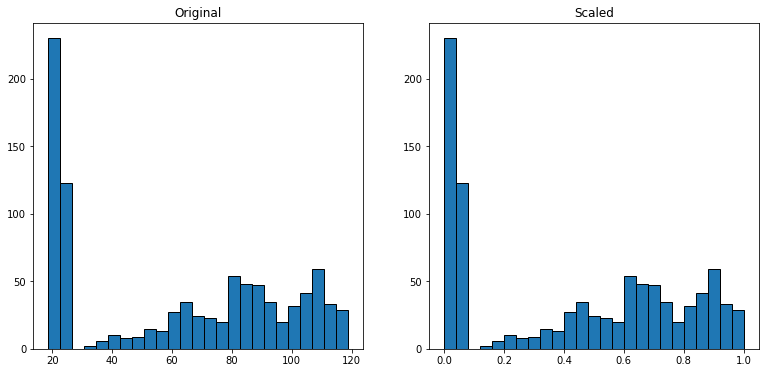

In [21]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_mm.monthly_charges, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

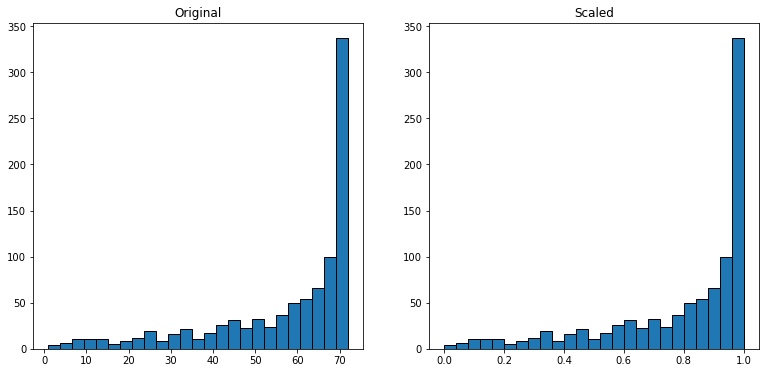

In [22]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_mm.tenure, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

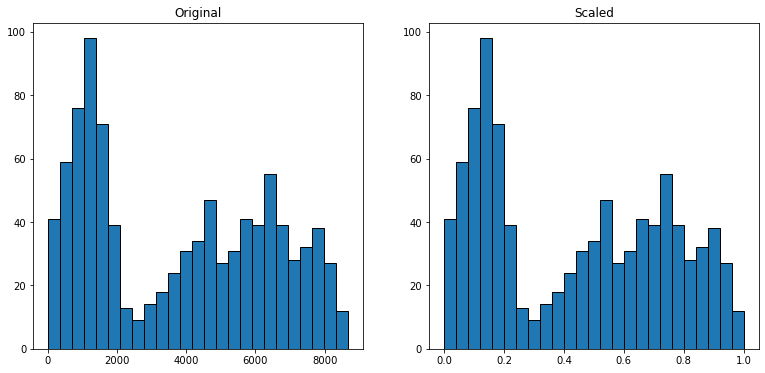

In [23]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_mm.total_charges, bins=25, ec='black')
plt.title('Scaled')

## Standard

In [24]:
standardscaler = sklearn.preprocessing.StandardScaler()

In [25]:
standardscaler.fit(train)

StandardScaler()

In [26]:
train_scaled_s = standardscaler.transform(train)
validate_scaled_s = standardscaler.transform(validate)
test_scaled_s = standardscaler.transform(test)

In [27]:
train_scaled_s[0:5]

array([[ 0.43308212,  0.71625999,  0.56898961],
       [-1.20057214, -1.54139245, -1.23792963],
       [-1.21341309, -0.52544885, -1.13936969],
       [ 0.65851215,  0.43405343,  0.6342468 ],
       [-1.20057214, -1.88004032, -1.2944422 ]])

In [28]:
# turn the numpy arrays into dataframes
train_scaled_s = pd.DataFrame(train_scaled_s, columns=train.columns)
validate_scaled_s = pd.DataFrame(validate_scaled_s, columns=train.columns)
test_scaled_s = pd.DataFrame(test_scaled_s, columns=train.columns)

In [29]:
train_scaled_s.head()

,monthly_charges,tenure,total_charges
0,0.433082,0.716260,0.568990
1,-1.200572,-1.541392,-1.237930
2,-1.213413,-0.525449,-1.139370
3,0.658512,0.434053,0.634247
4,-1.200572,-1.880040,-1.294442


In [30]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
6586-MYGKD,76.95,70,5289.80
1270-XKUCC,19.70,30,599.25
6425-JWTDV,19.25,48,855.10
6916-HIJSE,84.85,65,5459.20
8173-RXAYP,19.70,24,452.55


Text(0.5, 1.0, 'Scaled')

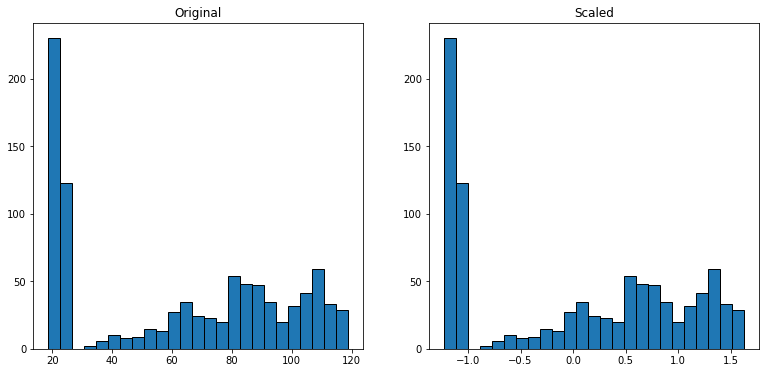

In [31]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_s.monthly_charges, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

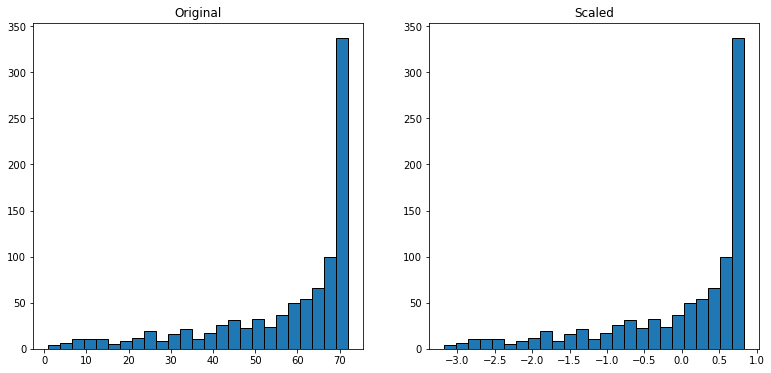

In [32]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_s.tenure, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

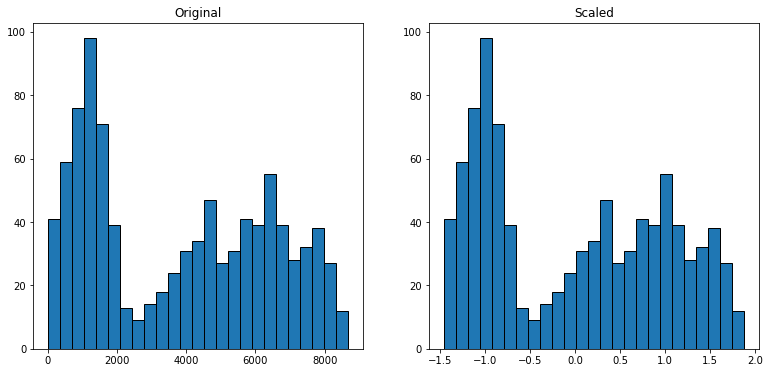

In [33]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_s.total_charges, bins=25, ec='black')
plt.title('Scaled')

## Robust

In [34]:
robustscaler = sklearn.preprocessing.RobustScaler()

In [35]:
robustscaler.fit(train)

RobustScaler()

In [36]:
train_scaled_r = robustscaler.transform(train)
validate_scaled_r = robustscaler.transform(validate)
test_scaled_r = robustscaler.transform(test)

In [37]:
train_scaled_r[0:5]

array([[ 0.1661154 ,  0.22222222,  0.28376075],
       [-0.67548695, -1.55555556, -0.67073313],
       [-0.68210217, -0.75555556, -0.61866946],
       [ 0.28224917,  0.        ,  0.31823246],
       [-0.67548695, -1.82222222, -0.70058555]])

In [38]:
# turn the numpy arrays into dataframes
train_scaled_r = pd.DataFrame(train_scaled_r, columns=train.columns)
validate_scaled_r = pd.DataFrame(validate_scaled_r, columns=train.columns)
test_scaled_r = pd.DataFrame(test_scaled_r, columns=train.columns)

In [39]:
train_scaled_r.head()

,monthly_charges,tenure,total_charges
0,0.166115,0.222222,0.283761
1,-0.675487,-1.555556,-0.670733
2,-0.682102,-0.755556,-0.618669
3,0.282249,0.000000,0.318232
4,-0.675487,-1.822222,-0.700586


In [40]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
6586-MYGKD,76.95,70,5289.80
1270-XKUCC,19.70,30,599.25
6425-JWTDV,19.25,48,855.10
6916-HIJSE,84.85,65,5459.20
8173-RXAYP,19.70,24,452.55


Text(0.5, 1.0, 'Scaled')

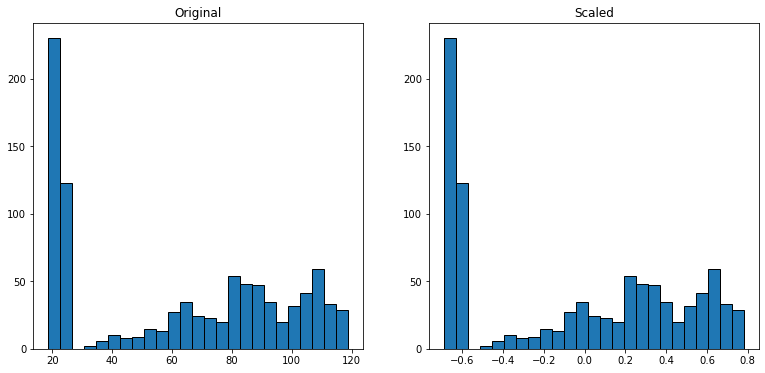

In [41]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_r.monthly_charges, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

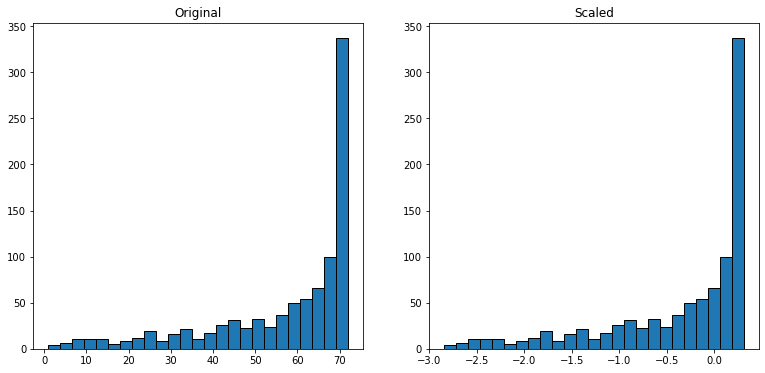

In [42]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_r.tenure, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

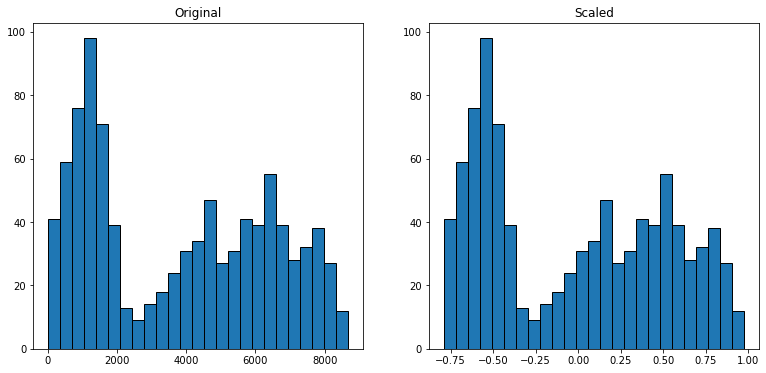

In [43]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_r.total_charges, bins=25, ec='black')
plt.title('Scaled')

# 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?